## Key Observations:
* heat map demonstrates month and season are highly correlated 
* statsmodels show that atemp, windspeed, hour, day, humidity and month are highly insignificant 
* recursive feature elimination indicated that season, holiday, atemp, month and hour should be included in modeling and most significant amoungst the features 

**hour, workingday,  atemp, humidity, month,  and holiday should be used for modeling**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
bikes=pd.read_csv('train.csv', index_col=0, parse_dates=True)

In [4]:
def cleanerX(X1):
    '''
    Add 4 columns into data frame: month, day, hour and name of day 
    '''
    X=X1.copy()
    X['month']=X.index.month
    X['day']=X.index.weekday
    X['hour']=X.index.hour
    X['dayName']=X.index.day_name()
    return X

In [5]:
bikes_clean=cleanerX(bikes)

## Fetaure Selection

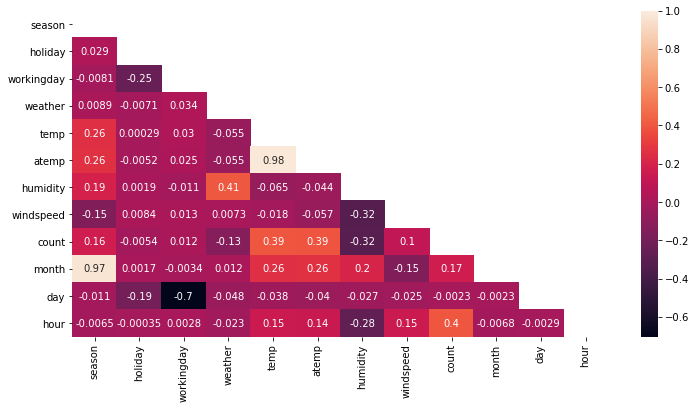

In [6]:
plt.figure(figsize=(12, 6))
corr=bikes_clean.drop(['casual', 'registered', 'dayName'],axis=1).corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

In [9]:
bikes_clean['w0']=1
m=OLS(bikes_clean['count'], 
      bikes_clean[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 
                'windspeed', 'casual', 'registered', 'month', 'day', 'hour', 'w0']])
resultM=m.fit()
featureTable= pd.DataFrame(round(resultM.pvalues, 5), 
                           index=bikes_clean.drop(['count','casual','registered','dayName',
                            'w0'],axis=1).columns, 
                           columns=['feature pval']).sort_values('feature pval')
featureTable

,feature pval
season,0.00000
holiday,0.00000
workingday,0.00000
weather,0.00000
temp,0.00000
atemp,0.00027
windspeed,0.28271
hour,0.45941
day,0.60725
humidity,0.72832


In [28]:
X=bikes_clean.drop(['count','casual','registered', 'w0', 'dayName'], axis=1)
y=bikes_clean['count']
estimator=LinearRegression()
selector=RFE(estimator)
selector=selector.fit(X,y)
for feature, decision in zip(X.columns, selector.support_):
    print(feature, ':', decision)
featureTable= pd.DataFrame(selector.ranking_, index=X.columns, 
                                     columns=['feature importance']).sort_values('feature importance')
display(featureTable)

season : True
holiday : True
workingday : False
weather : False
temp : False
atemp : True
humidity : False
windspeed : False
month : True
day : False
hour : True


,feature importance
season,1
holiday,1
atemp,1
month,1
hour,1
humidity,2
weather,3
temp,4
workingday,5
windspeed,6
